<a href="https://www.kaggle.com/code/risakashiwabara/eda-milk-and-milkproduct?scriptVersionId=151934138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We are aiming to become a data scientist.
Please comment if there are areas that need improvement.　 We will update this page every Thursday.

data

In [1]:
pip install xlrd --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xlrd

In [3]:
df_data = pd.read_csv('/kaggle/input/japandairy-product-consumption-in-japan/Processing volume for dairy products.csv', index_col=0)
df_reset = df_data.reset_index('year')
df_index = df_reset [1:38]
df = df_index.drop('total', axis=1)
df = df.dropna(how='all')
df

,year,1,2,3,4,5,6,7,8,9,10,11,12
1,1986.0,"279,371","226,665","290,857","284,512","280,248","250,798","252,839","249,894","195,586","219,201","206,454","233,380"
2,1987.0,"246,609","183,809","232,917","243,610","250,801","224,857","226,573","233,642","177,669","195,138","188,619","222,715"
3,1988.0,"242,342","199,219","250,523","245,284","250,279","224,329","234,842","245,019","185,765","204,848","201,146","234,901"
4,1989.0,"262,811","216,319","270,934","261,924","280,575","256,049","253,445","263,551","200,264","231,283","223,348","268,428"
5,1990.0,"289,737","234,314","291,323","292,397","293,033","251,100","236,790","239,305","188,705","210,279","214,136","260,521"
6,1991.0,"278,866","226,581","293,101","279,138","281,898","238,846","235,416","256,495","205,834","232,012","233,757","281,769"
7,1992.0,"298,131","254,661","304,793","295,849","300,610","272,610","278,135","286,168","220,156","256,443","256,562","304,431"
8,1993.0,"323,364","269,244","329,246","310,301","323,015","289,149","296,218","311,539","240,834","252,634","237,298","287,747"
9,1994.0,"299,783","243,163","289,374","278,766","287,346","262,063","232,598","228,306","197,292","214,544","205,177","259,119"
10,1995.0,"276,942","239,445","301,068","288,447","287,847","254,243","239,255","238,108","215,080","238,214","241,319","285,909"


In [4]:
num_features = df.columns[1:13]
df[num_features].describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,36,36,36,36,36,36,36,36,36,36,36,36
unique,36,36,36,35,36,36,36,36,36,36,36,36
top,"279,371","226,665","290,857","295,369","280,248","250,798","252,839","249,894","195,586","219,201","206,454","233,380"
freq,1,1,1,2,1,1,1,1,1,1,1,1


In [5]:
col = ['year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.columns=['year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1986.0,"279,371","226,665","290,857","284,512","280,248","250,798","252,839","249,894","195,586","219,201","206,454","233,380"
2,1987.0,"246,609","183,809","232,917","243,610","250,801","224,857","226,573","233,642","177,669","195,138","188,619","222,715"
3,1988.0,"242,342","199,219","250,523","245,284","250,279","224,329","234,842","245,019","185,765","204,848","201,146","234,901"
4,1989.0,"262,811","216,319","270,934","261,924","280,575","256,049","253,445","263,551","200,264","231,283","223,348","268,428"
5,1990.0,"289,737","234,314","291,323","292,397","293,033","251,100","236,790","239,305","188,705","210,279","214,136","260,521"
6,1991.0,"278,866","226,581","293,101","279,138","281,898","238,846","235,416","256,495","205,834","232,012","233,757","281,769"
7,1992.0,"298,131","254,661","304,793","295,849","300,610","272,610","278,135","286,168","220,156","256,443","256,562","304,431"
8,1993.0,"323,364","269,244","329,246","310,301","323,015","289,149","296,218","311,539","240,834","252,634","237,298","287,747"
9,1994.0,"299,783","243,163","289,374","278,766","287,346","262,063","232,598","228,306","197,292","214,544","205,177","259,119"
10,1995.0,"276,942","239,445","301,068","288,447","287,847","254,243","239,255","238,108","215,080","238,214","241,319","285,909"


In [6]:
df['year'] = df['year'].astype(int)
df_=df.replace(",","", regex=True)
df_ = df_.astype('int')
df_.dtypes

year    int64
Jan     int64
Feb     int64
Mar     int64
Apr     int64
May     int64
Jun     int64
Jul     int64
Aug     int64
Sep     int64
Oct     int64
Nov     int64
Dec     int64
dtype: object

①Graph--scattergram

Jan


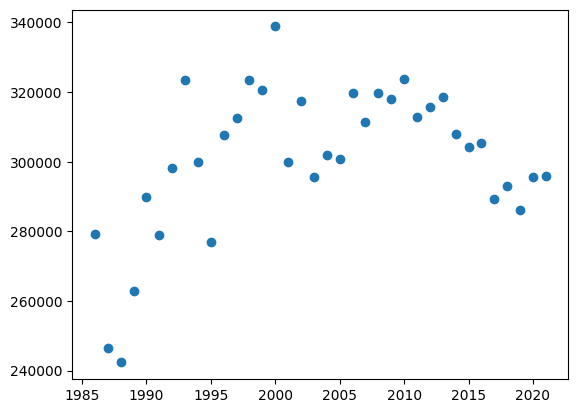

Feb


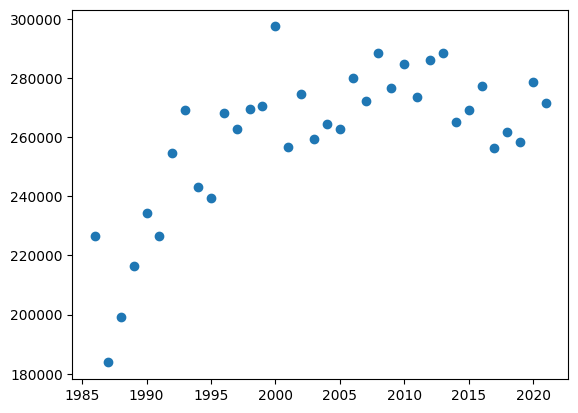

Mar


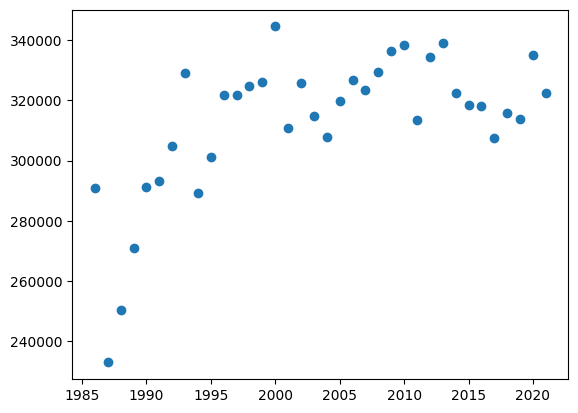

Apr


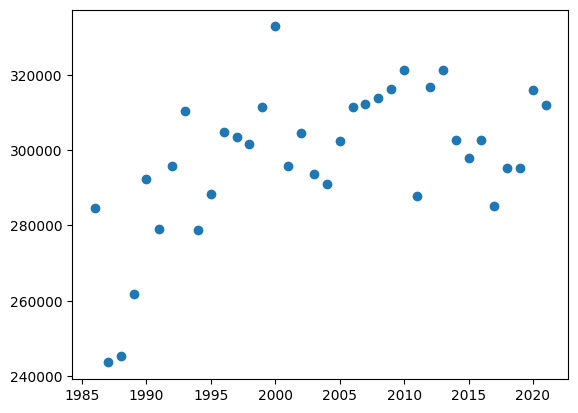

May


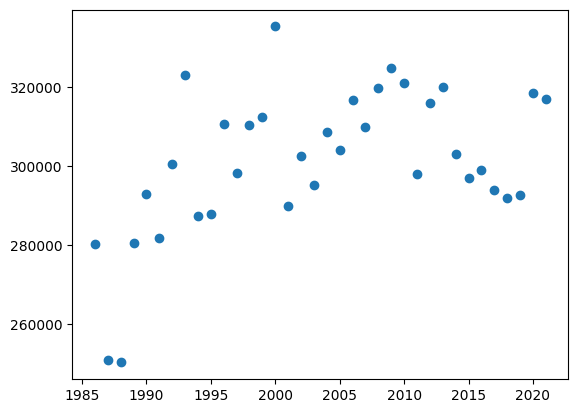

Jun


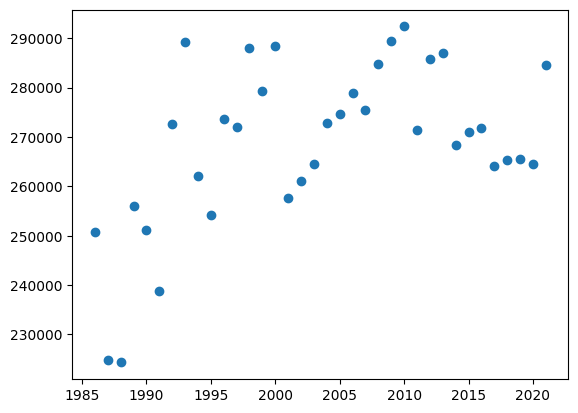

Jul


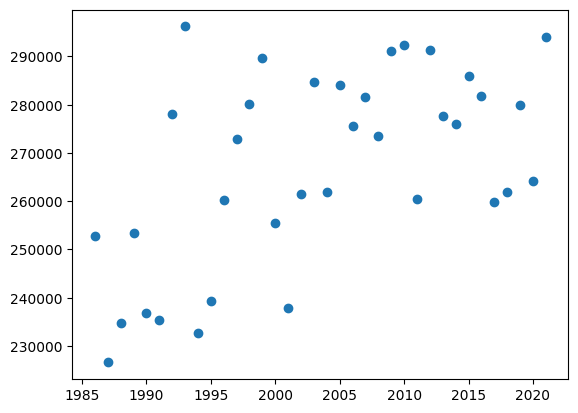

Aug


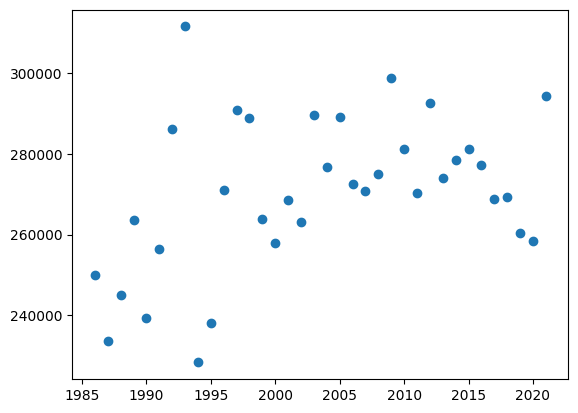

Sep


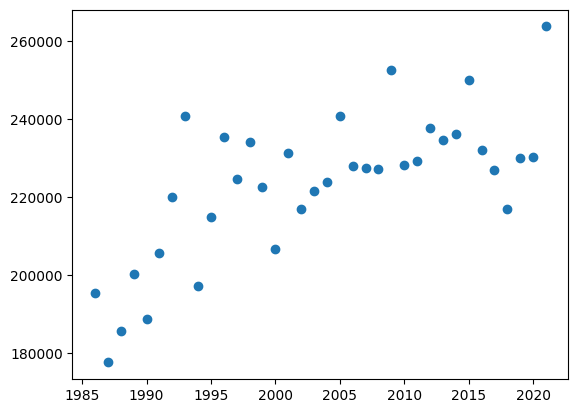

Oct


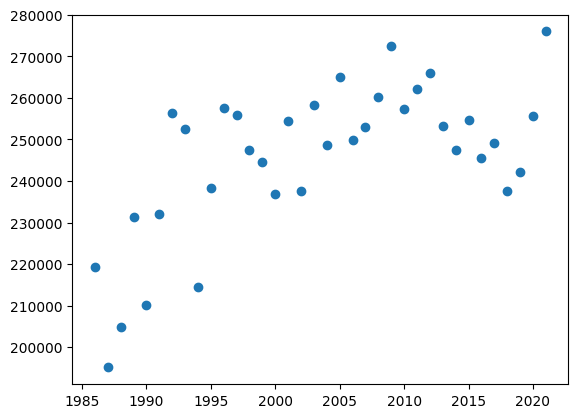

Nov


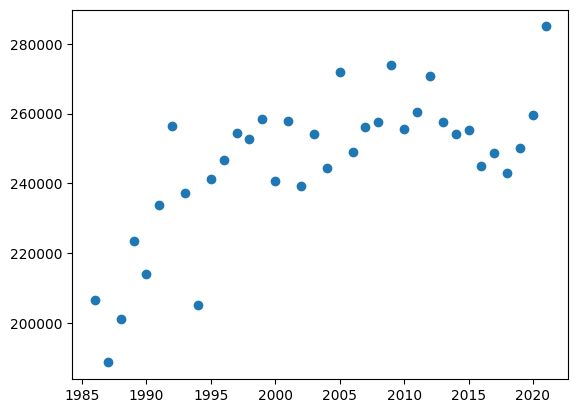

Dec


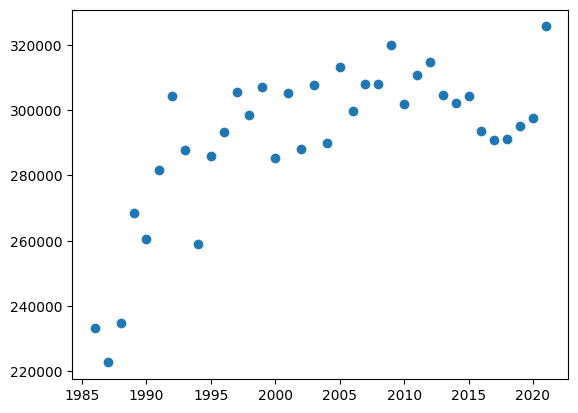

In [7]:
df_number = df_.select_dtypes(include=np.number)
i =  ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for a in i:
    print(a)
    plt.scatter(df_['year'],df_[a])
    plt.show()

➁　Graph---Histogram 

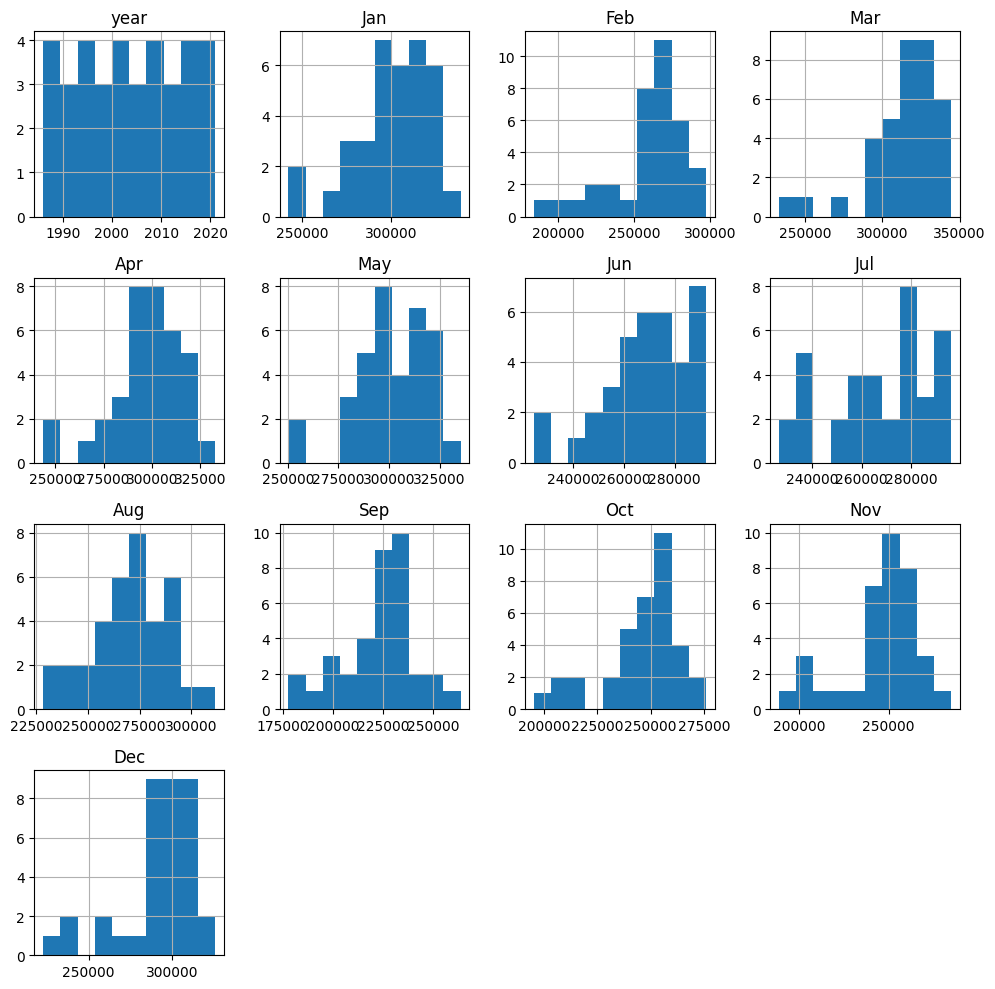

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # グラフが見きれないようにするためサイズを大きくしておく
df_.hist(); # 一括でヒストグラムを描画する
plt.tight_layout() # グラフ同士が重ならないようにする関数
plt.show() # グラフの表示